In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

C:\Users\80117051\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [31]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\80117051\appdata\local\continuum\anaconda3\lib\site-packages (0.10.1)
Requirement not upgraded as not directly required: scipy>=1.0.1 in c:\users\80117051\appdata\local\continuum\anaconda3\lib\site-packages (from seaborn) (1.1.0)
Requirement not upgraded as not directly required: matplotlib>=2.1.2 in c:\users\80117051\appdata\local\continuum\anaconda3\lib\site-packages (from seaborn) (2.2.3)
Requirement not upgraded as not directly required: pandas>=0.22.0 in c:\users\80117051\appdata\local\continuum\anaconda3\lib\site-packages (from seaborn) (0.23.4)
Requirement not upgraded as not directly required: numpy>=1.13.3 in c:\users\80117051\appdata\local\continuum\anaconda3\lib\site-packages (from seaborn) (1.15.4)
Requirement not upgraded as not directly required: cycler>=0.10 in c:\users\80117051\appdata\local\continuum\anaconda3\lib\site-packages (from matplotlib>=2.1.2->seaborn) (0.10.0)
Requirement not upgraded as not directly require

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


# Soal 1: Scatter Plot

Buatlah scatterplot menggunakan Seaborn dari data df di atas, variasikan menggunakan palette yang telah disediakan sehingga didapatkan output sesuai expected.

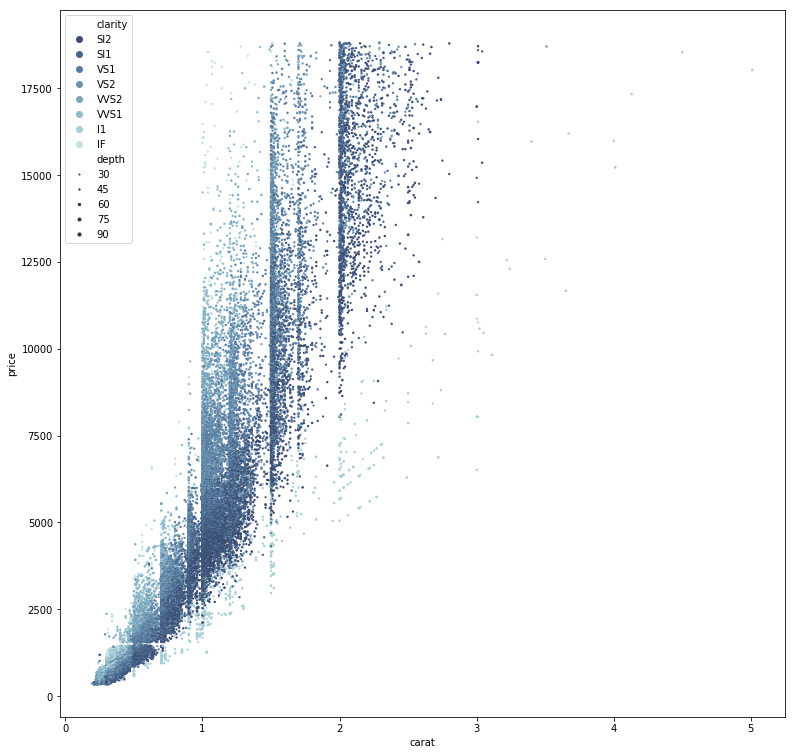

In [7]:
fig, ax = plt.subplots(figsize=(13, 13))
palette="ch:r=-.2,d=.3_r"

x = df['carat']
y = df['price']
hue = df['clarity']
clarity_order = ['I1','SI2','SI1','VS2','VS1','WS2','WS1','IF']
size = df['depth']

sns.scatterplot(x,y,hue = hue, size=size,palette=palette,sizes=(1,10),linewidth=0) #MAAF PAS DI TAMBAHKAN ARGUMENT HUE_ORDER = CLARITY_ORDER MALAH ERROR HASILNYA
plt.show()

Expected Output:

![alt text](https://drive.google.com/uc?id=1OyzNnrnkJ7TL8DIyh_2O97WuzesyLL7W)

# Soal 2: Facet Grid

Gunakan fungsi hexbin berikut untuk diterapkan pada mapping dari facetgridnya sehingga dihasilkan output sesuai expected.

```
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
```


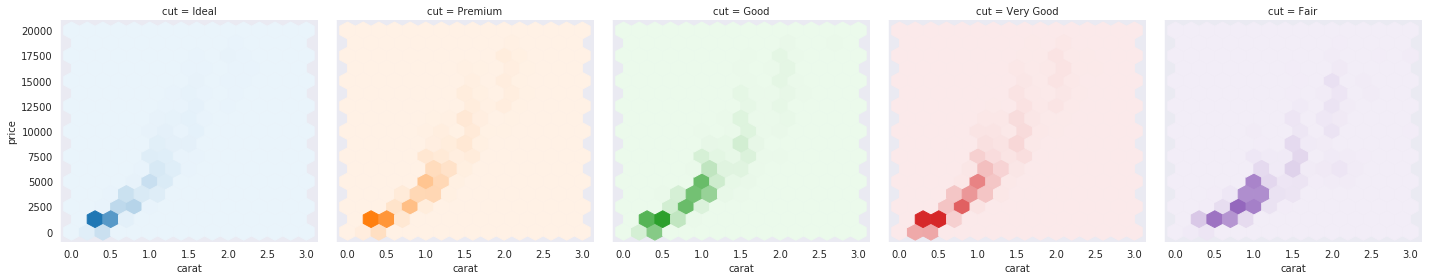

In [9]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
    
with sns.axes_style('dark'):
    fg = sns.FacetGrid(df,col='cut',hue='cut',height=4)
    
fg.map(hexbin,'carat','price',extent = [0.,3.0,0,20000])

Expected Output:

![alt text](https://drive.google.com/uc?id=1ZG6Uu0R_8mPAjpwublowrdUM6Hd1OXkI)

# Soal 3: Pair Plot

Ambil 300 data secara acak dari df, kemudian buat pair plotnya dari 300 data tersebut untuk kolom carat, depth, table, dan price sehingga dihasilkan output sesuai expected.

C:\Users\80117051\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


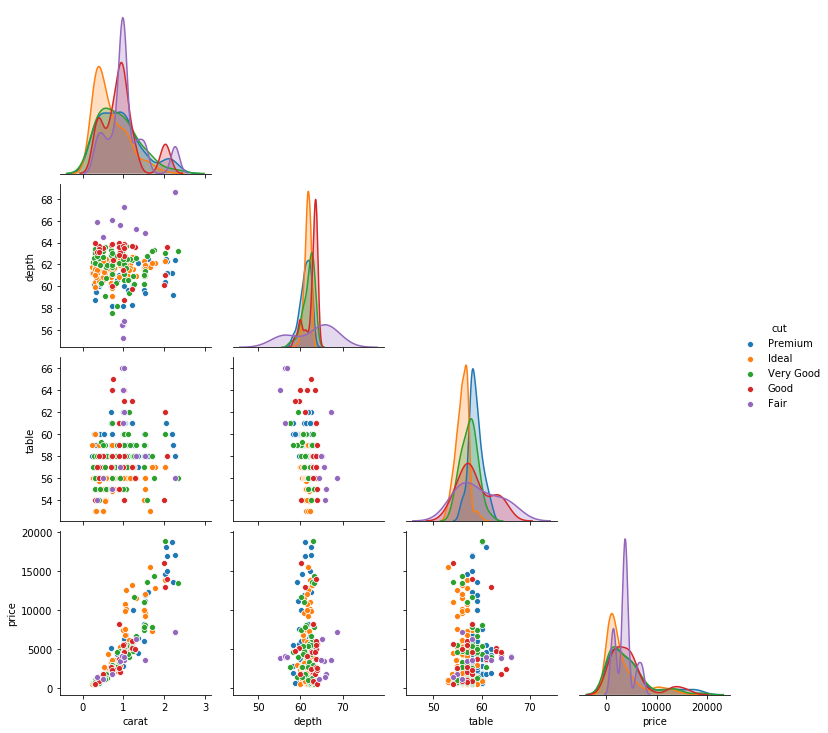

In [3]:
df = df.sample(n=300, random_state=123)

pl = sns.pairplot(df,hue='cut',vars=['carat','depth','table','price'],corner = True)
pl

Expected Output:

![alt text](https://drive.google.com/uc?id=1N3guRLAn5sIhfzzKFdvf1cZpmtEc-cw9)

# Soal 4: Joint Plot

Gunakan data yang sama dengan soal 3 untuk menghasilkan dua visualisasi joint plot antara carat dan price nya sesuai expected output.

C:\Users\80117051\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\80117051\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


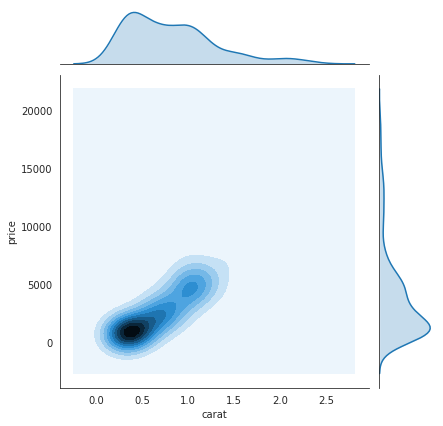

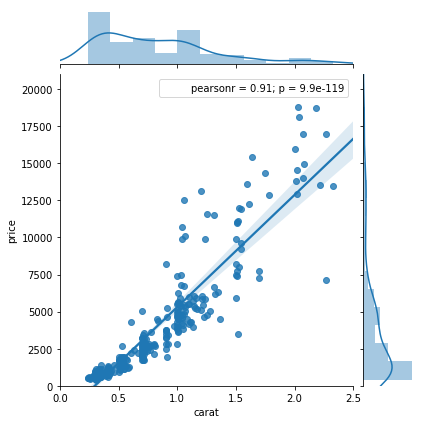

In [18]:
from scipy import stats

with sns.axes_style('white'):
    sns.jointplot(df['carat'], df['price'], kind = 'kde')

sns.jointplot("carat","price",data=df,kind="reg",stat_func=stats.pearsonr,xlim=(0,2.5),ylim=(0,21000))

Expected Output 1:

![alt text](https://drive.google.com/uc?id=1xX5Jq38-rr_oFD-eDRbBYCBA24Nmw2C5)

Expected Output 2:

![alt text](https://drive.google.com/uc?id=1QXY89CXRe1BzU0k7OBrr2fTn8WwIhWHo)